In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset and deleting reduntant columns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Data cleansing and dropping columns in intial analysis that look redundant
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)
train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
train = train.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Reason for dropping columns
1. Passenger Id is unique number for each passenger and is in no particular order<br>
2. Cabin as it contained large number of missing values, not enough values to train dataset<br>
3. Ticket contained too many categories, tough to derive useful insights<br>
4. Name was unique for each passenger and details about passenger was mentioned in other columns<br>

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking for missing values
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Strategy to deal with missing values<br> 
1. Replace values in age with mean<br>       
2. Replace the missing values in embarked column with S as S had highest frequency aming other categorical features<br>

In [6]:
#Taking care of missing values
train.loc[train.Age.isna(), 'Age'] = train[~train.Age.isna()].Age.mean()
train.loc[train.Embarked.isna(),'Embarked'] = "S"
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Exploratory Data Analysis
train.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We have taken care of all the missing values. Next step will be exploratory data analysis and figuring out patterns in data

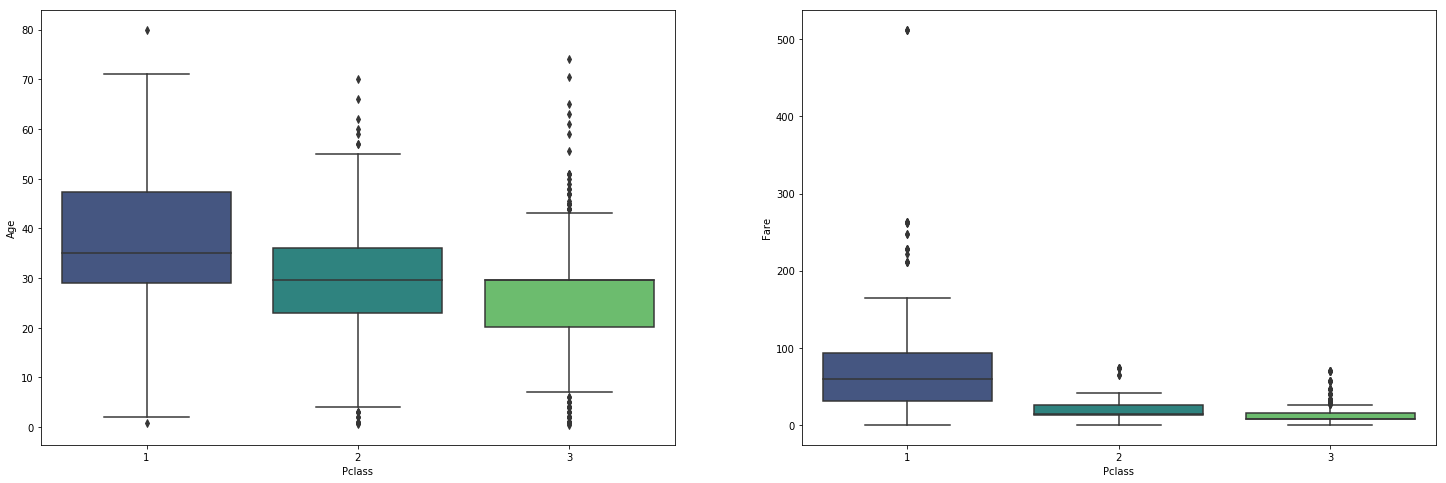

In [8]:
#Checking for outliers

fig,axes = plt.subplots(1, 2,figsize=(25,8))
print(axes)

sns.boxplot(x='Pclass',y='Age',data=train, palette='viridis',ax=axes[0] )
sns.boxplot(x='Pclass',y='Fare',data=train, palette='viridis',ax=axes[1])

plt.show()

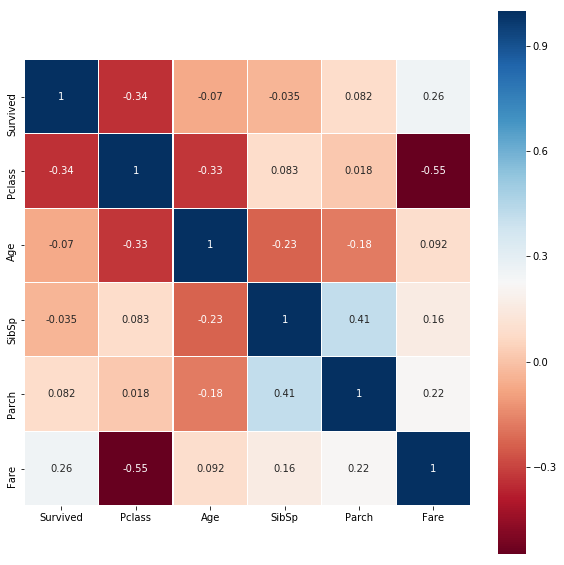

In [9]:
numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    train.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

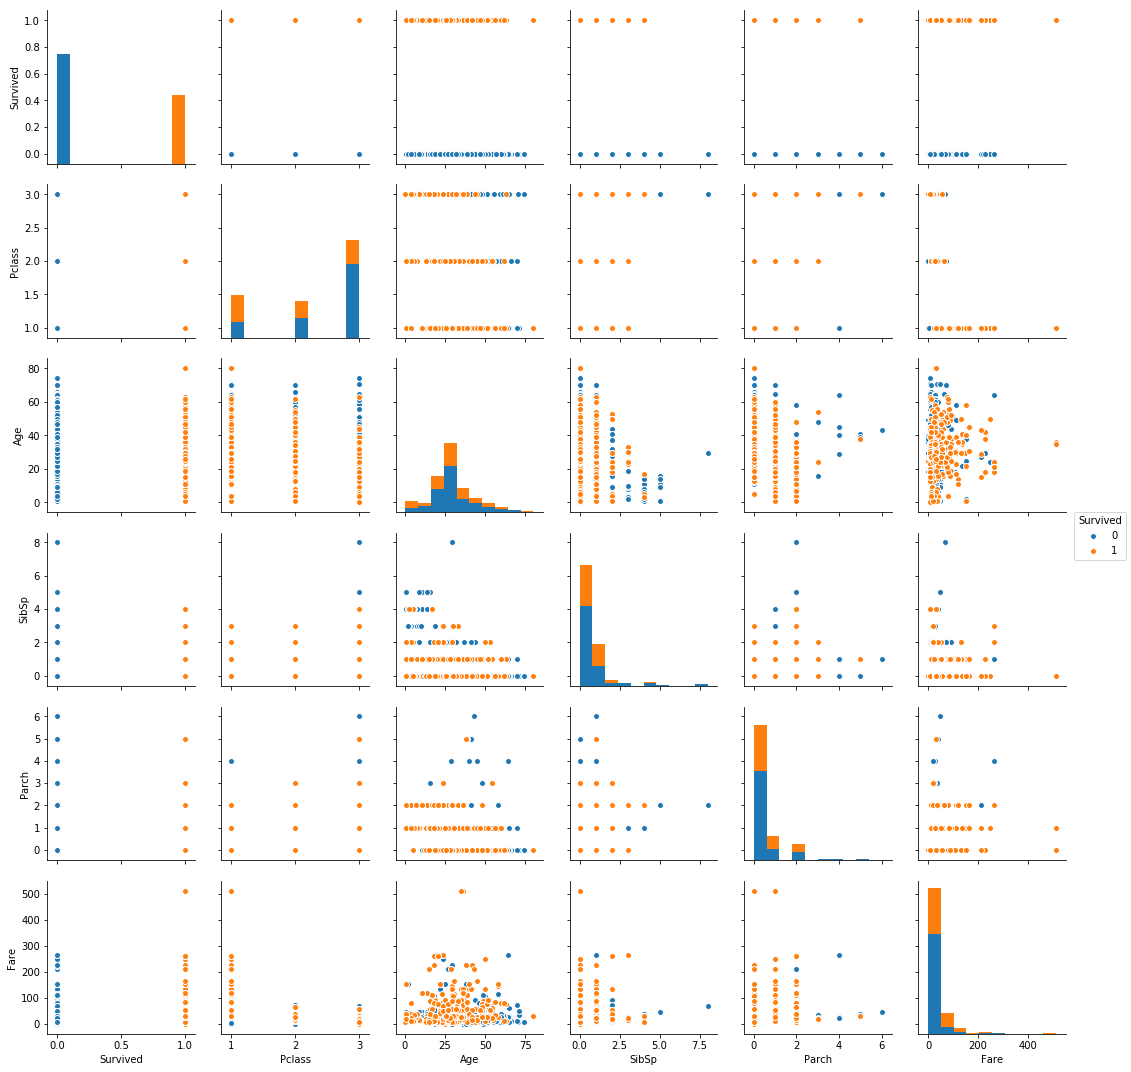

In [10]:
numerical_column = ['int64','float64']
plt.figure(figsize=(10,10))
sns.pairplot(train.select_dtypes(include=numerical_column), hue = 'Survived')

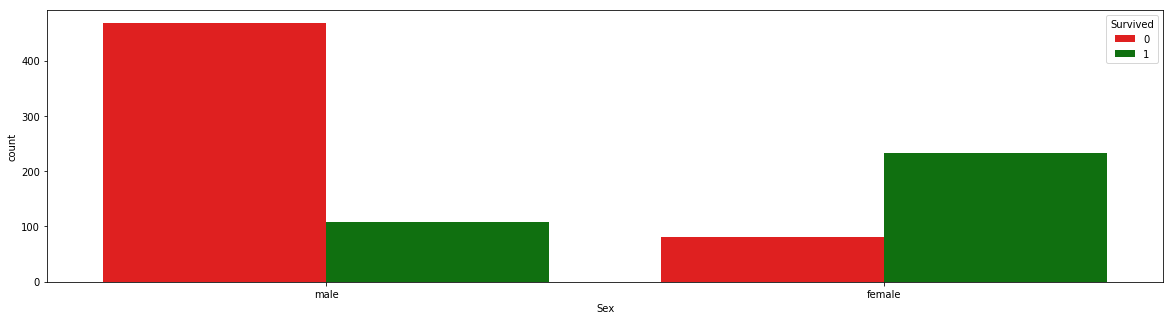

In [11]:
palette ={1:"g", 0:"r"}
plt.figure(figsize=(20, 5))
sns.countplot(x='Sex',data=train,hue="Survived", palette = palette)

Females had a higher probability for surviving than males

In [12]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [14]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
#Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])
train['Pclass'] = labelencoder.fit_transform(train['Pclass'])
train['SibSp'] = labelencoder.fit_transform(train['SibSp'])
train['Parch'] = labelencoder.fit_transform(train['Parch'])
train['Embarked'] = labelencoder.fit_transform(train['Embarked'])
labelencoder_y = LabelEncoder()
test['Sex'] = labelencoder_y.fit_transform(test['Sex'])
test['Pclass'] = labelencoder_y.fit_transform(test['Pclass'])
test['SibSp'] = labelencoder_y.fit_transform(test['SibSp'])
test['Parch'] = labelencoder_y.fit_transform(test['Parch'])
test['Embarked'] = labelencoder_y.fit_transform(test['Embarked'])

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [17]:
#Splitiing in test and train

test.loc[test.Age.isna(), 'Age'] = test[~test.Age.isna()].Age.mean()
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
#test.loc[test.Age.isna(), 'Fare'] = test[~test.Fare.isna()].Fare.mean()
X_train = train.iloc[:, 1:8].values
y_train = train.iloc[:, 0].values

# Applying Machine Learning Models

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(test)
acc_log = round(classifier.score(X_train, y_train) * 100, 2)
print(acc_log)

80.25


In [19]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
1,Sex,-2.521555
0,Pclass,-0.914150
3,SibSp,-0.301470
6,Embarked,-0.153540
4,Parch,-0.080693
2,Age,-0.030835
5,Fare,0.003569


In [20]:
#Support Vector Machines

from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

89.34

In [21]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\Ishant\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.04

In [22]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.2

In [23]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predB = random_forest.predict(test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.2

In [24]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

C:\Users\Ishant\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.83

In [25]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.24

In [26]:
#knn classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.84

In [27]:
#Evaluating different Models

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent' , 
              'Decision Tree'],
    'Score': [acc_svc,acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
7,Decision Tree,98.20
0,Support Vector Machines,89.34
1,KNN,83.84
2,Logistic Regression,80.25
4,Naive Bayes,79.24
5,Perceptron,71.83
6,Stochastic Gradient Decent,71.04


In [30]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_predB
    })
submission.to_csv('submission.csv', index=False)